In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install qiskit==0.39.2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.6 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.39.2-py3-none-any.whl size=12201 sha256=c329596ee9d15e5c207745c5c54c1b521f9f8fcec9ee297bb2912dfb81496c12
  Stored in dire

In [14]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=af131afaa95501e0275cf17c0a52a8ddee43100cc8dc4bae8528e707ee1f6eb5
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [15]:
import qiskit
import math
qiskit.__qiskit_version__


{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt
import re

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer

from qiskit.tools.visualization import circuit_drawer, plot_histogram

In [17]:
qr = QuantumRegister(2, name = 'qr')
cr = ClassicalRegister(4, name = 'cr')

In [18]:
singlet = QuantumCircuit(qr,cr, name = 'singlet')
singlet.h(qr[0])
singlet.cx(qr[0],qr[1])

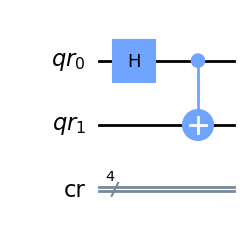

In [19]:
singlet.draw(output = 'mpl')

In [20]:
measureA1 = QuantumCircuit(qr, cr, name = 'measureA1')
measureA1.h(qr[0])
measureA1.measure(qr[0], cr[0])


measureA2 = QuantumCircuit(qr, cr, name = 'measureA2')
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.t(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0],cr[0])


measureA3 = QuantumCircuit(qr,cr, name = 'measureA3')
measureA3.measure(qr[0], cr[0])

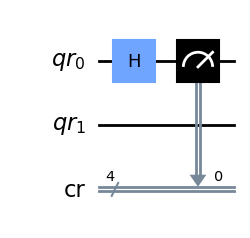

In [21]:
measureA1.draw(output = 'mpl')

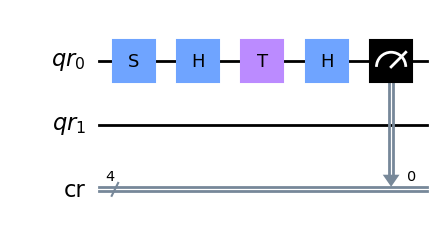

In [22]:
measureA2.draw(output = 'mpl')

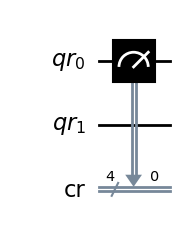

In [23]:
measureA3.draw(output = 'mpl')

In [24]:
measureB1 = QuantumCircuit(qr, cr, name = 'measureB1')
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1],cr[1])


measureB2 = QuantumCircuit(qr,cr, name = 'measureB2')
measureB2.measure(qr[1], cr[1])


measureB3 = QuantumCircuit(qr, cr, name = 'measureB3')
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1],cr[1])

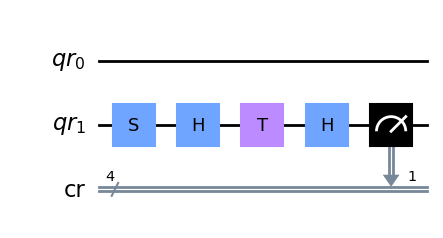

In [25]:
measureB1.draw(output = 'mpl')

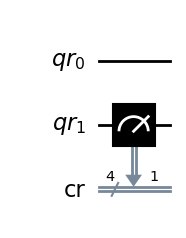

In [26]:
measureB2.draw(output = 'mpl')

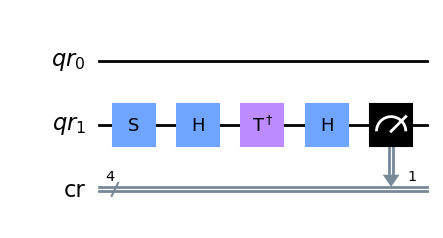

In [27]:
measureB3.draw(output = 'mpl')

In [28]:
#lists of measurement circuits

aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]

In [29]:
numberofSinglets = 500

In [30]:
aliceMeasurementChoices = [random.randint(1,3) for i in range(numberofSinglets)]
bobMeasurementChoices = [random.randint(1,3) for i in range(numberofSinglets)]

In [32]:
print(aliceMeasurementChoices)

[1, 3, 1, 3, 1, 1, 2, 3, 3, 1, 2, 2, 1, 2, 2, 1, 2, 3, 1, 3, 3, 3, 2, 3, 3, 1, 2, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 1, 1, 1, 1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 1, 3, 1, 1, 1, 2, 3, 2, 1, 3, 3, 3, 1, 1, 3, 1, 1, 2, 3, 1, 2, 3, 3, 3, 1, 2, 2, 1, 1, 1, 3, 1, 3, 2, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 3, 2, 3, 3, 2, 2, 1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 3, 2, 2, 3, 1, 1, 3, 2, 2, 1, 3, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2, 3, 2, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 2, 3, 1, 1, 3, 1, 1, 2, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 1, 1, 3, 3, 1, 2, 1, 3, 3, 3, 2, 3, 1, 2, 1, 3, 3, 2, 1, 1, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 2, 1, 1, 2, 3, 2, 3, 3, 2, 2, 2, 1, 2, 3, 3, 2, 1, 1, 3, 1, 3, 1, 2, 1, 2, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 3, 3, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 1, 3, 3, 

In [31]:
print(bobMeasurementChoices)

[2, 1, 1, 2, 1, 3, 1, 3, 3, 1, 2, 1, 3, 1, 3, 3, 1, 1, 2, 2, 2, 1, 3, 1, 1, 3, 3, 2, 3, 2, 3, 2, 1, 2, 1, 1, 2, 3, 1, 3, 2, 1, 2, 3, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1, 2, 3, 1, 3, 1, 1, 2, 3, 3, 2, 1, 3, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 2, 1, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 1, 1, 1, 3, 2, 1, 1, 3, 3, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 1, 2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 3, 2, 1, 3, 3, 2, 1, 3, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 1, 2, 3, 2, 1, 3, 1, 2, 3, 3, 2, 3, 1, 1, 1, 3, 2, 3, 2, 3, 3, 3, 1, 1, 3, 1, 2, 3, 3, 1, 2, 3, 2, 1, 3, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2, 3, 3, 1, 1, 2, 3, 3, 2, 1, 1, 2, 1, 2, 2, 2, 3, 3, 2, 2, 1, 2, 1, 1, 2, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3, 3, 1, 2, 1, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 3, 1, 3, 3, 1, 1, 2, 1, 3, 1, 3, 3, 2, 2, 3, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 

In [33]:
circuits = []

for i in range(numberofSinglets):
  circuitName = singlet + aliceMeasurements[aliceMeasurementChoices[i]-1] + bobMeasurements[bobMeasurementChoices[i]-1]
  circuits.append(circuitName)

<ipython-input-33-a83859fcf243>:4: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuitName = singlet + aliceMeasurements[aliceMeasurementChoices[i]-1] + bobMeasurements[bobMeasurementChoices[i]-1]


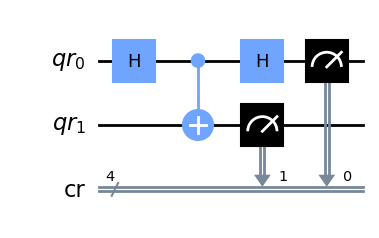

In [34]:
circuits[0].draw(output = 'mpl')

In [35]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuits, backend = backend, shots = 1).result()

In [36]:
result.get_counts(circuits[4])

{'0011': 1}

In [37]:
abPatterns = [
    re.compile('..00$'),
    re.compile('..01$'),
    re.compile('..10$'),
    re.compile('..11$')
]

In [38]:
aliceResults = []
bobResults = []

for i in range(numberofSinglets):
  res = list(result.get_counts(circuits[i]).keys())[0]

  if abPatterns[0].search(res):
    aliceResults.append(0)
    bobResults.append(0)
  if abPatterns[1].search(res):
    aliceResults.append(0)
    bobResults.append(1)
  if abPatterns[2].search(res):
    aliceResults.append(1)
    bobResults.append(0)
  if abPatterns[3].search(res):
    aliceResults.append(1)
    bobResults.append(1)



In [39]:
print(aliceResults)

[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

In [40]:
print(bobResults)

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 

In [41]:
aliceKey = []
bobKey = []

for i in range(numberofSinglets):
  if(aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i] == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
    aliceKey.append(aliceResults[i])
    bobKey.append(bobResults[i])

keylength = len(aliceKey)
print("Key length: ", keylength)

Key length:  118


In [42]:
abKeyMismatches = 0

for j in range(keylength):
  if aliceKey[j] != bobKey[j]:
    abKeyMismatches += 1

print("Key mismatches: ", abKeyMismatches)

Key mismatches:  0


In [43]:
print(aliceKey)

[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]


In [44]:
print(bobKey)

[0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]


# **SHA-256**

In [45]:
import hashlib

def sha256_from_list(bit_list):
    """
    Compute the SHA-256 hash of a given list of bits (0s and 1s).

    :param bit_list: A list of integers (0 or 1) representing binary data.
    :return: A string representing the SHA-256 hash in hexadecimal format.
    """
    # Validate input
    if not all(bit in (0, 1) for bit in bit_list):
        raise ValueError("Input list must only contain 0s and 1s.")

    # Convert the list of bits to bytes
    byte_data = int(''.join(map(str, bit_list)), 2).to_bytes((len(bit_list) + 7) // 8, byteorder='big')

    # Compute the SHA-256 hash
    hash_sha256 = hashlib.sha256(byte_data)

    # Return the hash as a hexadecimal string
    return hash_sha256.hexdigest()


In [46]:
hashed_value = sha256_from_list(aliceKey)

In [47]:
print("SHA3-512 Hash:", hashed_value)

SHA3-512 Hash: 8ffa82f866b801295482d0e42eb3060c3d805539d72ecdd4a9c183e65268a174


In [48]:
hashed_value_bob = sha256_from_list(bobKey)
print("SHA3-512 Hash:", hashed_value_bob)

SHA3-512 Hash: 8ffa82f866b801295482d0e42eb3060c3d805539d72ecdd4a9c183e65268a174


# **STEGANOGRAPHY**

In [37]:
!pip install pydub

In [38]:
!pip install sounddevice

In [1]:
!pip install numpy
!pip install scipy

In [4]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def clip_audio(audio_data, min_value=-32768, max_value=32767):
    """
    Clips the audio data to stay within the valid audio range.
    """
    return np.clip(audio_data, min_value, max_value)

In [6]:
def embed_audio(carrier_path, secret_path, output_path, num_bits=8):
    """
    Embeds secret audio into the carrier audio using multiple least significant bits.
    """
    # Open the carrier and secret audio files
    carrier = wave.open(carrier_path, 'rb')
    secret = wave.open(secret_path, 'rb')

    # Ensure compatibility between carrier and secret audio
    if carrier.getnchannels() != secret.getnchannels() or carrier.getsampwidth() != secret.getsampwidth():
        raise ValueError("Carrier and secret audio must have the same number of channels and sample width.")

    # Read audio data
    carrier_frames = np.frombuffer(carrier.readframes(carrier.getnframes()), dtype=np.int16)
    secret_frames = np.frombuffer(secret.readframes(secret.getnframes()), dtype=np.int16)

    # Ensure carrier has enough capacity to store secret
    max_secret_length = len(carrier_frames) // (16 // num_bits)
    if len(secret_frames) > max_secret_length:
        raise ValueError(f"Carrier audio cannot hold the secret audio. Max capacity: {max_secret_length}, got: {len(secret_frames)}.")

    # Resize the secret frames to match embedding capacity
    padded_secret_frames = np.zeros(max_secret_length, dtype=np.int16)
    padded_secret_frames[:len(secret_frames)] = secret_frames

    # Embed the secret audio into the carrier
    embedded_frames = np.copy(carrier_frames)
    mask = (1 << num_bits) - 1  # Mask to isolate the LSBs
    embedded_frames &= ~mask  # Clear the least significant bits
    embedded_frames[:len(padded_secret_frames)] += (padded_secret_frames >> (16 - num_bits)) & mask  # Embed secret bits

    # Clip audio values to valid range
    embedded_frames = clip_audio(embedded_frames)

    # Write the embedded audio to a new file
    embedded_audio = wave.open(output_path, 'wb')
    embedded_audio.setparams(carrier.getparams())
    embedded_audio.writeframes(embedded_frames.astype(np.int16).tobytes())

    # Close files
    carrier.close()
    secret.close()
    embedded_audio.close()

    print(f"Embedding complete. Saved to {output_path}")


In [7]:
carrier_audio = "/content/drive/MyDrive/Colab resources/Petit Biscuit - Sunset Lover (Official Video).wav"  # Carrier audio
secret_audio = "/content/drive/MyDrive/Colab resources/msg.wav"  # Secret audio
embedded_audio = "embedded.wav"  # Output for the embedded audio

In [8]:
# Embed the secret audio into the carrier
embed_audio(carrier_audio, secret_audio, embedded_audio, num_bits=8)

Embedding complete. Saved to embedded.wav


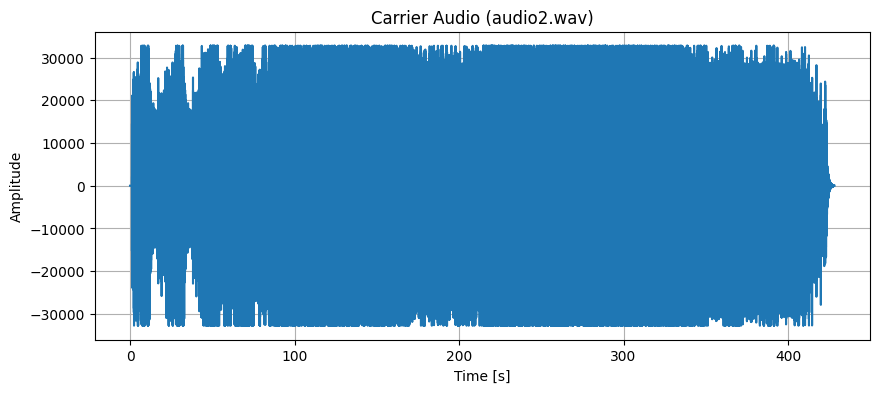

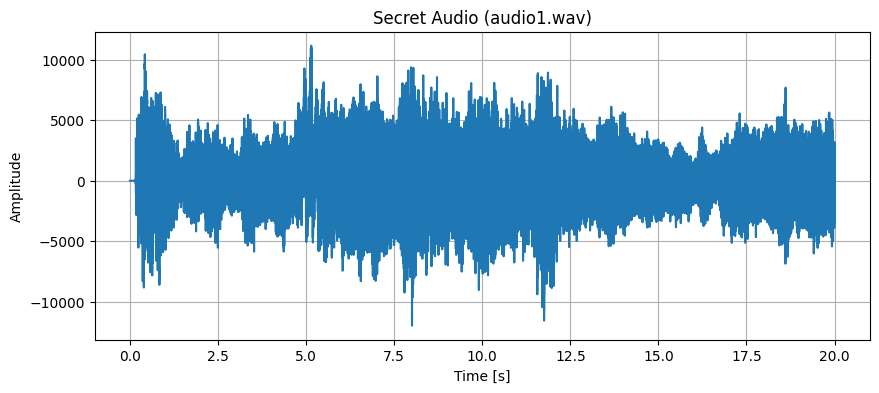

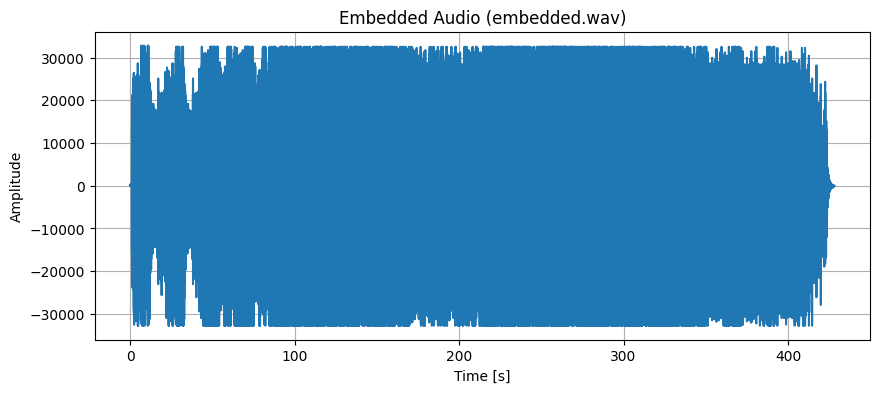

In [9]:
def plot_waveform(audio_path, title):
    """
    Plots the waveform of the given audio file.
    """
    # Open the audio file
    with wave.open(audio_path, 'rb') as audio:
        # Read frames and extract audio data
        frames = audio.readframes(audio.getnframes())
        audio_data = np.frombuffer(frames, dtype=np.int16)

        # Generate the time axis for plotting
        time = np.linspace(0, len(audio_data) / audio.getframerate(), num=len(audio_data))

        # Plot the waveform
        plt.figure(figsize=(10, 4))
        plt.plot(time, audio_data)
        plt.title(title)
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

# File paths to the audio files
carrier_audio = "/content/drive/MyDrive/Colab resources/Petit Biscuit - Sunset Lover (Official Video).wav"  # Carrier audio
secret_audio = "/content/drive/MyDrive/Colab resources/msg.wav"  # Secret audio
embedded_audio = "embedded.wav"  # Embedded audio
  # Retrieved audio

# Plot waveforms of the audio files
plot_waveform(carrier_audio, 'Carrier Audio (audio2.wav)')
plot_waveform(secret_audio, 'Secret Audio (audio1.wav)')
plot_waveform(embedded_audio, 'Embedded Audio (embedded.wav)')

# **ChaCha20-Poly1305**

In [10]:
import os
from cryptography.hazmat.primitives.ciphers.aead import ChaCha20Poly1305
import sys
import binascii
from scipy.io.wavfile import read as wavread, write as wavwrite

In [11]:
input_audio_file = '/content/embedded.wav'

output_audio_file = 'encrypted_audio_cha.wav'
decrypted_audio_file = 'decrypted_audio_cha.wav'

In [49]:
def encode_audio(input_audio_file, output_audio_file, alice_key, additional_data):
    """
    Encrypt the audio file using ChaCha20-Poly1305 encryption.

    Parameters:
    - input_audio_file: Path to the input audio file (WAV format).
    - output_audio_file: Path to save the encrypted audio file.
    - alice_key: Key used for encryption (hex-encoded string).
    - additional_data: Associated additional data for encryption.

    Returns:
    - nonce: The nonce used for encryption.
    """
    # Read the input audio file
    fs, audio_data = wavread(input_audio_file)

    # Convert audio data to bytes
    audio_bytes = audio_data.tobytes()

    # Convert the key from hex string to bytes
    key = binascii.unhexlify(alice_key)

    # Initialize ChaCha20-Poly1305
    chacha = ChaCha20Poly1305(key)

    # Generate a random nonce
    nonce = os.urandom(12)

    # Encrypt the audio bytes
    cipher = chacha.encrypt(nonce, audio_bytes, additional_data.encode())

    # Save the encrypted data as raw bytes in a WAV file format
    wavwrite(output_audio_file, fs, np.frombuffer(cipher, dtype=np.int16))

    return nonce

In [50]:
add = "audio encryption"
nonce = encode_audio(input_audio_file, output_audio_file, hashed_value, add)

In [51]:
def decode_audio(encrypted_audio_file, decrypted_audio_file, bob_key, nonce, additional_data):
    """
    Decrypt the encrypted audio file using ChaCha20-Poly1305 encryption.

    Parameters:
    - encrypted_audio_file: Path to the encrypted audio file (WAV format).
    - decrypted_audio_file: Path to save the decrypted audio file.
    - bob_key: Key used for decryption (hex-encoded string).
    - nonce: The nonce used for encryption.
    - additional_data: Associated additional data for decryption.

    Returns:
    - None
    """
    # Read the encrypted audio file
    fs, encrypted_audio_data = wavread(encrypted_audio_file)

    # Convert the encrypted data to bytes
    encrypted_audio_bytes = encrypted_audio_data.tobytes()

    # Convert the key from hex string to bytes
    key = binascii.unhexlify(bob_key)

    # Initialize ChaCha20-Poly1305
    chacha = ChaCha20Poly1305(key)

    # Decrypt the audio bytes
    decrypted_audio_bytes = chacha.decrypt(nonce, encrypted_audio_bytes, additional_data.encode())

    # Convert decrypted bytes back to numpy array
    decrypted_audio_data = np.frombuffer(decrypted_audio_bytes, dtype=np.int16)

    # Save the decrypted audio back to a WAV file
    wavwrite(decrypted_audio_file, fs, decrypted_audio_data)


In [52]:
decode_audio(output_audio_file, decrypted_audio_file, hashed_value_bob, nonce, add)

In [53]:
def extract_audio(embedded_path, secret_output_path, secret_length, num_bits=8):
    """
    Extracts the secret audio from the embedded audio file.
    """
    # Open the embedded audio file
    embedded = wave.open(embedded_path, 'rb')

    # Read audio data
    embedded_frames = np.frombuffer(embedded.readframes(embedded.getnframes()), dtype=np.int16)

    # Extract the secret audio
    mask = (1 << num_bits) - 1  # Mask to isolate the embedded bits
    extracted_bits = (embedded_frames & mask) << (16 - num_bits)
    secret_frames = extracted_bits[:secret_length]

    # Apply a low-pass filter to reduce noise
    secret_frames = np.convolve(secret_frames, np.ones(5)/5, mode='same')  # Simple smoothing (moving average)

    # Clip audio values to valid range
    secret_frames = clip_audio(secret_frames)

    # Write the secret audio to a new file
    secret_audio = wave.open(secret_output_path, 'wb')
    secret_audio.setparams(embedded.getparams())
    secret_audio.setnframes(secret_length)
    secret_audio.writeframes(secret_frames.astype(np.int16).tobytes())

    # Close files
    embedded.close()
    secret_audio.close()

    print(f"Extraction complete. Secret audio saved to {secret_output_path}")

In [54]:
extracted_audio = "retrieved_audio1.wav"

In [55]:
# Extract the secret audio from the embedded file
secret_audio_length = wave.open(secret_audio, 'rb').getnframes()  # Length of the secret audio
extract_audio(embedded_audio, extracted_audio, secret_audio_length, num_bits=8)

Extraction complete. Secret audio saved to retrieved_audio1.wav


In [ ]:
def plot_waveform(audio_path, title):
    """
    Plots the waveform of the given audio file.
    """
    # Open the audio file
    with wave.open(audio_path, 'rb') as audio:
        # Read frames and extract audio data
        frames = audio.readframes(audio.getnframes())
        audio_data = np.frombuffer(frames, dtype=np.int16)

        # Generate the time axis for plotting
        time = np.linspace(0, len(audio_data) / audio.getframerate(), num=len(audio_data))

        # Plot the waveform
        plt.figure(figsize=(10, 4))
        plt.plot(time, audio_data)
        plt.title(title)
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()


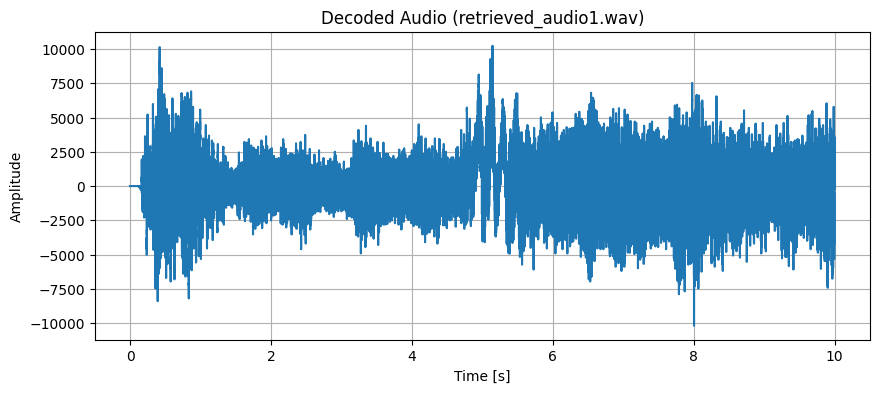

In [56]:
retrieved_audio = "retrieved_audio1.wav"
plot_waveform(retrieved_audio, 'Decoded Audio (retrieved_audio1.wav)')  # Retrieved audio

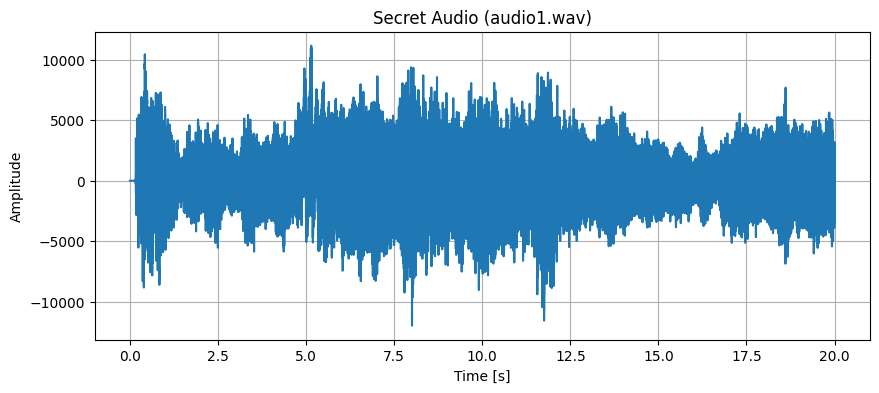

In [58]:
secret_audio = "/content/drive/MyDrive/Colab resources/msg.wav"  # Secret audio
plot_waveform(secret_audio, 'Secret Audio (audio1.wav)')